In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#load the dataset
sentiment_df = pd.read_csv('fear_greed_index.csv') 
trader_df = pd.read_csv('historical_data.csv') 

In [27]:
sentiment_df.columns

Index(['timestamp', 'value', 'classification', 'date', 'Date'], dtype='object')

In [4]:
sentiment_df["date"]

0       2018-02-01
1       2018-02-02
2       2018-02-03
3       2018-02-04
4       2018-02-05
           ...    
2639    2025-04-28
2640    2025-04-29
2641    2025-04-30
2642    2025-05-01
2643    2025-05-02
Name: date, Length: 2644, dtype: object

In [7]:
trader_df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [9]:
trader_df['Timestamp IST']

0         02-12-2024 22:50
1         02-12-2024 22:50
2         02-12-2024 22:50
3         02-12-2024 22:50
4         02-12-2024 22:50
                ...       
211219    25-04-2025 15:35
211220    25-04-2025 15:35
211221    25-04-2025 15:35
211222    25-04-2025 15:35
211223    25-04-2025 15:35
Name: Timestamp IST, Length: 211224, dtype: object

In [14]:
#coverting to date time format
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], errors='coerce')
trader_df['date'] = trader_df['Timestamp IST'].dt.date

In [15]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date

In [17]:
#merging the data set based on date
merged_df = pd.merge(trader_df, sentiment_df, on='date', how='left')


In [20]:
merged_df.groupby('classification')['Closed PnL'].mean()


classification
Extreme Fear       1.891632
Extreme Greed    205.816345
Fear             128.287950
Greed             53.988003
Neutral           27.088803
Name: Closed PnL, dtype: float64

In [22]:
merged_df['classification'].value_counts()


classification
Fear             13869
Greed            11292
Extreme Greed     5621
Neutral           2756
Extreme Fear      2326
Name: count, dtype: int64

In [23]:
if 'Leverage' in merged_df.columns:
    merged_df.groupby('Classification')['Leverage'].describe()


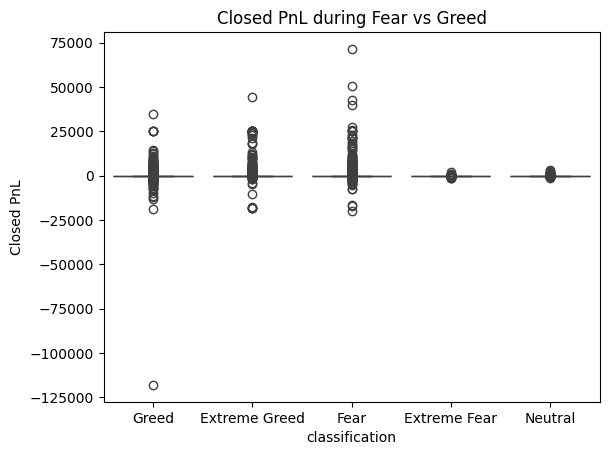

In [26]:
sns.boxplot(x='classification', y='Closed PnL', data=merged_df)
plt.title("Closed PnL during Fear vs Greed")
plt.show()